## Tipo di dati in PANDAS

- dataframe [input ]
- serie     [output], corripsonde ad una sola colonna


In [16]:
import pandas as pd
import numpy as np

#### 1. Scegliere i dati
nomefile = './marziani.csv'
data = pd.read_csv(nomefile)        #legge i dati e fornisce un dataframe di tipo PANDAS
print(data.head())                  # .head mi stampa le prime 5 righe del dataframe di default. 
                                    # Posso specificare le righe come parametro
                                    # con .tile() mi da gli ultimi 5
    
print(">>colonne: ", data.columns)  # per vedere le intestazioni di colonna
print(">>tipi\n",data.dtypes)       # per vedere i tipi

  specie colore  n_arti  peso  altezza  larghezza
0   Elon  viola    20.0  3.87    14.77      73.22
1   Elon  viola    27.0  3.15    28.19      88.44
2   Elon  viola    25.0  4.35    12.05      76.74
3   Elon    blu    20.0  3.76     9.90      81.37
4   Elon    blu    28.0  2.86    19.87      84.65
>>colonne:  Index(['specie', 'colore', 'n_arti', 'peso', 'altezza', 'larghezza'], dtype='object')
>>tipi
 specie        object
colore        object
n_arti       float64
peso         float64
altezza      float64
larghezza    float64
dtype: object


>>describe Specie
['Elon' 'Musk']

count     2000
unique       2
top       Musk
freq      1000
Name: specie, dtype: object
>> Elon
count     1000
unique       1
top       Elon
freq      1000
Name: specie, dtype: object
count     995
unique      3
top       blu
freq      340
Name: colore, dtype: object
count    999.000000
mean      24.637638
std        2.899248
min       20.000000
25%       22.000000
50%       25.000000
75%       27.000000
max       29.000000
Name: n_arti, dtype: float64
count    1000.000000
mean        3.500900
std         0.489139
min         2.130000
25%         3.170000
50%         3.490000
75%         3.830000
max         5.050000
Name: peso, dtype: float64
count    996.000000
mean      17.518082
std        4.227621
min        3.170000
25%       14.740000
50%       17.330000
75%       20.307500
max       29.400000
Name: altezza, dtype: float64
count    999.000000
mean      84.719429
std       11.456814
min       44.700000
25%       77.045000
50%       84.890000
75%

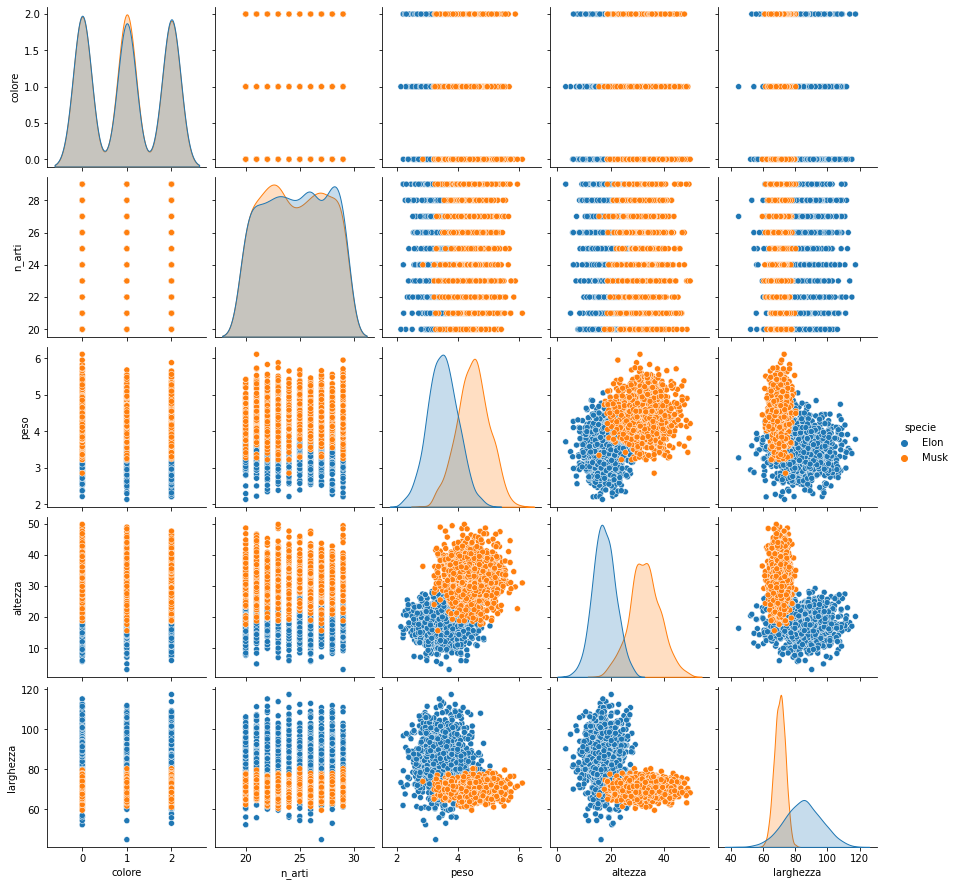

In [17]:
#### 2. PREPARAZIONE DEI DATI
### ANALISI DEI DATI
print(">>describe Specie")

"""
posso riferirmi alle colonne in due modi:
- dot notation
- con le quadre
"""

print(data.specie.unique())        # mi restituice i valori univoci all'interno della colonna. Mi dice quali tipi ci sono

"""
.describe()
- su colonna con stringa mi fa vedere count (numeri campioni), quanti valori differenti, quello che compare di piu, freq ass 
- su colonna con numeri 
"""
print(f"\n{data['specie'].describe()}")  

###
for specie in data.specie.unique():     # per ogni specie
    dati = data[data['specie'] == specie]  #mi seleziona tutte le righe per ogni specie
    print('>>', specie)
    for x in data.columns:
        print(dati[x].describe() )      # per avere statistiche sui dati 


### RENDIAMO NUMERICHE LE LABEL
"""
.dropna() -> ottengo solo quei valori che non sono nulli, NA = Not A number
"""
colori = np.sort(data['colore'].dropna().unique())  # colori in ordine alfabetico
print(colori)

d = data.copy()        # facciamo una copia dei dati originali

for k in range (len(colori)):           # sostituiamo ogni colore con l'indice
    d.loc[:,'colore'].replace(colori[k], k, inplace = True) #con inplace le modifiche si effetuano sull'oggetto stesso, non devo assegnarlo ad un nuovo oggetto
print(d.head())

### ANALISI PER SCELTA FEATURE
import seaborn as sns   # conda install seaborn

sns.pairplot(d, hue='specie', dropna=True) 

### ELIMINAZIONE DATI MANCANTI
# Colonne con dati mancanti
cols_with_missing = [col for col in d.columns if d[col].isnull().sum()]
print(cols_with_missing)
# caratteristiche scelte per la classificazione
cols_selected = ['peso','altezza', 'larghezza']
# si eliminano le righe con dati mancanti solo nelle colonne selezionate
d = data.dropna(axis='index', subset = cols_selected) 
print(d.shape)                
# Colonne rimanenti con dati mancanti
print([col for col in d.columns if d[col].isnull().sum()])

### INDIVIDUAZIONE X E y
X = d[['peso','altezza','larghezza']]
y = d['specie']
print(X.head())
print(y.head())

      peso  altezza  larghezza
1853  4.58    29.13      70.59
486   3.93    25.37      95.30
846   3.95    27.27      73.86
376   3.01    21.95      74.95
580   3.17    12.02      76.47
Numero di campioni in X:  1394
Musk    710
Elon    684
Name: specie, dtype: int64
1853    Musk
486     Elon
846     Elon
376     Elon
580     Elon
Name: specie, dtype: object
>>Media: 
peso         3.995
altezza     25.276
larghezza   77.389
dtype: float64
>>Deviazione standard: 
peso         0.708
altezza      9.173
larghezza   10.984
dtype: float64
>>X train Normalizzato 
           peso  altezza  larghezza
count 1394.000 1394.000   1394.000
mean    -0.000   -0.000     -0.000
std      1.000    1.000      1.000
min     -2.536   -2.410     -2.297
25%     -0.742   -0.863     -0.724
50%     -0.007   -0.117     -0.360
75%      0.755    0.846      0.667
max      2.988    2.572      3.444
>>X test Normalizzato 
          peso  altezza  larghezza
count 598.000  598.000    598.000
mean   -0.001   -0.048      0

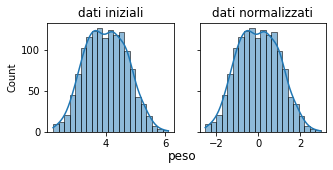

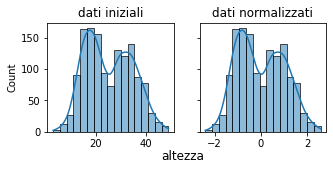

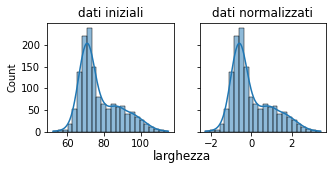

In [18]:
#### 3. SUDDIVISIONE TRAIN E TEST
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                    train_size=0.7, random_state=0)          #questa funzione prende 70% dei dati ed effettua il training
                                                             #random state è il seme della generazione casuale

print(X_train.head())
print("Numero di campioni in X: ",X_train.shape[0])    
print(y_train.value_counts())       # quanti valori per ogni specie
print(y_train.head())

### STANDARIZZAZIONE
pd.options.display.float_format = '{:.3f}'.format #visualizza i dati con solo 3 decimali

m = X_train.mean()
print(f">>Media: \n{m}")
s = X_train.std()
print(f">>Deviazione standard: \n{s}")

X_train_std = ((X_train-m)/s)     # normalizziamo
print(f">>X train Normalizzato \n {X_train_std.describe()}")

## VERIFICA 
import seaborn as sns  
import matplotlib.pyplot as plt

for col in X_train.columns:
    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(5,2)) #condividi asse y 
    fig.suptitle(col,y=0)  #titolo posizionato in basso
    # titolo dei due grafici affiancati
    axes[0].set_title("dati iniziali"); axes[1].set_title("dati normalizzati") 
    # eliminiamo tutte le altre etichette
    axes[0].set_xlabel(' ');  axes[1].set_xlabel(' ') 
    # disegniamo gli istrogrammi e la curva KDE = Kernel Density Estimation
    sns.histplot(ax=axes[0], x=X_train[col], kde=True) 
    sns.histplot(ax=axes[1], x=X_train_std[col], kde=True)

## NORMALIZZAZIONE DEL TEST SET
X_test_std = ((X_test-m)/s)     # normalizziamo
print(f">>X test Normalizzato \n {X_test_std.describe()}")

pd.options.display.float_format = None # ripristina la visualizzazione di default

E' necessario normalizzare i dati. In una rete neurale, i livelli di mezzo si calcolano sommando  il valore di input moltiplicato per il peso del collegamento. Potrebbe risultare che degli input con valori maggiori siano più importanti. E' importante normalizzare questi dati per evitare ciò. Mettiamo tutti i dati in un range di valori uguale per tutti. 

Faccio quindi:

nuovo valore = (valore - media) / deviazione standard

In [19]:
#### 4. Scegliere il modello da utilizzare

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100,100), random_state=1, max_iter=300) #due livelli nascosti da 100 l'uno, con lo stesso seme di random

Max_iteration sono il numero di volte che avviene l'aggiornametno dei pesi. 
Il batch è un sottoinsieme dell'insieme dai campioni, per sapere quanti bathc basta fare n_dati / max_iter

In [20]:

#### 5.Addestrare il modello FIT

model.fit(X_train_std, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300, random_state=1)

Alla fit devo passare due paramentri, il seti di campioni già standadizzato, ed il risultato. Lui inizia, prende i primi dati, si allena e si aggiusta

In [21]:
#### 6. Testare il modello PREDICT

#Predizioni sui dati di training
print("Train")
print(y_train.values[:5])
print(model.predict(X_train_std[:5]))

#Predizioni sui dati di test
print("Test")
print(y_test.values[:5])
print(model.predict(X_test_std[:5]))

#Predizioni su un caso specifico
print("Caso")
print(model.predict([[4.1,25.2,79.9]]))

Train
['Musk' 'Elon' 'Elon' 'Elon' 'Elon']
['Musk' 'Elon' 'Elon' 'Elon' 'Elon']
Test
['Musk' 'Musk' 'Elon' 'Elon' 'Musk']
['Musk' 'Musk' 'Elon' 'Elon' 'Musk']
Caso
['Elon']


Devo valutare la bontà della predizione: devo calcolare l'accuratezza, ciò la percentuale delle risposte corrette rispetto a quelle date in assoluto. 

- calcolo l'errore medio assolto

devo verificare che non abbia imparato troppo {underfitting}, ma anche che non pari troppo {overfitting}. Non devo arrivare al 100 % di riconoscimento nel traingi: vorrebbe dire che starebbe imparando a memoria, quindi non sta generalizzando, sta memorizzando. Se gli passo altri campioni potremme darmi risultati scadenti


In [22]:
#### 7. Valutare il modello e migliorarlo ACCURANCY_SCORE

print("Accuratezza dati di TRAIN: %.3f" % model.score(X_train_std, y_train))

# questo è un metodo alternativo per avere l'accuratezza
predictions = model.predict(X_test_std)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
print("Accuratezza dati di TEST: %.3f" % score)



Accuratezza dati di TRAIN: 0.984
Accuratezza dati di TEST: 0.975


C:\Users\lucab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lucab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lucab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lucab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lucab\anaconda3\lib\site-packages\sklearn\neural_network\_multi

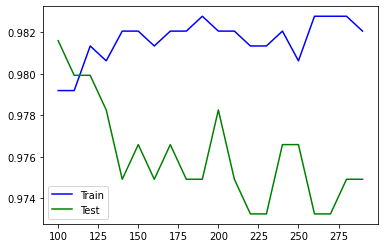

In [23]:
## evitiamo overfitting
start = 100      #parto da 100 epoche e con passo di 10 arrivo fino a 300
stop = 300
passo = 10

vEpochs = np.arange(start, stop, passo)
vAccTrain = []  #lista dell'accuratezza sui dati di train
vAccTest = []   #lista dell'accuratezza sui dati di test

for e in vEpochs:
    mlp = MLPClassifier(hidden_layer_sizes=(100,100), random_state=1, max_iter=e)
    mlp.fit(X_train_std, y_train)   
    vAccTrain.append(mlp.score(X_train_std, y_train)) # accuratezza sul training set
    vAccTest.append(mlp.score(X_test_std, y_test))    # accuratezza sul test set

#grafico dell'accuratezza 
import matplotlib.pyplot as plt
plt.plot(vEpochs, vAccTrain, c='b', label = 'Train')
plt.plot(vEpochs, vAccTest, c='g', label = 'Test')
plt.legend()

In [24]:
# Proviamo con 115 epoche
model01 = MLPClassifier(hidden_layer_sizes=(100,100), random_state=1, max_iter=115)
model01.fit(X_train_std, y_train)
print("Accuratezza dati di TRAIN: %.3f" % model01.score(X_train_std, y_train))
print("Accuratezza dati di TEST: %.3f" % model01.score(X_test_std, y_test))
print(model01.predict([[4.1,25.2,79.9]]))

Accuratezza dati di TRAIN: 0.980
Accuratezza dati di TEST: 0.980
['Elon']


C:\Users\lucab\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (115) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
#### 8. Salviamo il modello
from joblib import dump, load

#per esportare
dump(model01, 'marziani.joblib') 

#per importare
modelIn = load('marziani.joblib') 
print(modelIn.predict([[4.1,25.2,79.9]]))

['Elon']
